In [2]:
from sympy import init_session
init_session()

p = Symbol('p')

def laplace_transform_derivatives(e):
    """
    Evaluate the unevaluted laplace transforms of derivatives
    of functions
    """
    if isinstance(e, LaplaceTransform):
        if isinstance(e.args[0], Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            #n = len(d.args) - 1
            return ((s**n) * LaplaceTransform(d.args[0], t, s) -
                     sum([s**(n-i) * diff(d.args[0], t, i-1).subs(t, 0) for i in range(1, n+1)]))
    if isinstance(e, (Add, Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    return e

IPython console for SymPy 1.8 (Python 3.8.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



## **Solving an ODE w/ Laplace Transform Using SymPy**

The following shows an example of solving a second order ode with SymPy.

### **We first start by defining the ODE of interest. (If you're comfortable with SymPy then scroll to the bottom to directly plug and chug)**
### **add ```g(t).diff(t, n)``` for nth derivatives**

C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:12

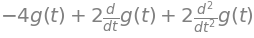

In [3]:
ode =  2*g(t).diff(t, 2) + 2*g(t).diff(t) - 4*g(t)
ode

### **Directly take the laplace transform of the ode. Here I use p to represent the new domain, but any variable suffices.**

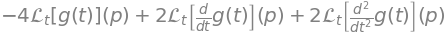

In [4]:
l_ode = laplace_transform(ode, t, p)
l_ode

### **For aesthetics and readability I substitute all the weird L terms with the capital of the function**

In [5]:
L_g = laplace_transform(g(t), t, p) 
G = Symbol("G")

### **Proceed to take the derivative and implement the term substitution**

In [6]:
l_ode2 = laplace_transform_derivatives(l_ode).subs(L_g, G)
l_ode2

     2                                       ⎛d       ⎞│   
2⋅G⋅p  + 2⋅G⋅p - 4⋅G - 2⋅p⋅g(0) - 2⋅g(0) - 2⋅⎜──(g(t))⎟│   
                                             ⎝dt      ⎠│t=0

### **Solve for the initial conditions**
### **for higher order odes with more ics: separate by commas and add ```{... , g(t).diff(t, n).subs(t, 0): c, ...}``` for nth derivative initial condition equal to some constant c**

C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Vivek\anaconda3\envs\bioenv\lib\site-packages\IPython\lib\latextools.py:12

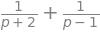

In [10]:
ics = {g(0): 2, g(t).diff(t).subs(t, 0): -1}
l_ode3 = l_ode2.subs(ics)
Gsoln = solve(l_ode3, G)
Gsoln[0].apart(p)

In [9]:
inverse_laplace_transform(Gsoln[0].apart(p), p, t)

## **General Laplace ODE Solver**

### **Note that $\theta (t)$ merely represents the Heaviside step function and can be disregarded in the final answer**

In [11]:
## mess with just these first two lines if you don't know python 
## (see above to learn how to change these lines properly for different odes)
ode = 2*g(t).diff(t, 2) + 2*g(t).diff(t) - 4*g(t) # subtract rhs if there is one
ics = {g(0): 2, g(t).diff(t).subs(t, 0): -1}

L_g = laplace_transform(g(t), t, p)
G = Symbol('G')

l_ode = laplace_transform(ode, t, p)
l_ode = laplace_transform_derivatives(l_ode).subs(L_g, G).subs(ics)
soln = solve(l_ode, G)[0]
inverse_laplace_transform(soln.apart(p), p, t)

In [ ]:
%load_ext watermark
%watermark -v -p sympy

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.27.0

sympy: 1.8

